In [1]:
#Importing the important libraries
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Step 1 : Reading and Understanding the Data

In [3]:
# Read the given csv file dataset
bike_data= pd.read_csv('day.csv')

In [4]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bike_data.shape

(730, 16)

In [6]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# checking missing values
bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

No missing value is present.

In [9]:
# checking for duplicate values
bike_data_dup= bike_data.copy()

In [10]:
# checking for duplicate and dropping the enitre row if there is any duplicate.
bike_data_dup.drop_duplicates(subset=None, inplace=True)

In [11]:
bike_data.shape

(730, 16)

In [12]:
bike_data_dup.shape

(730, 16)

As the number of rows and columns are same in both bike_data and bike_data_dup i.e there is no duplicate values in the data.

In [13]:
# Renaming the columns
bike_data.rename(columns = {'yr':'year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True) 
bike_data.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [14]:
# converting numerical variables associated with lebels into categorical variables.
bike_data['season']=bike_data.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
bike_data['month']=bike_data.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike_data['weathersit']=bike_data.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
bike_data['weekday']=bike_data.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [15]:
bike_data.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Step 2 : EXPLORATORY DATA ANALYSIS (EDA)

## Data Visualisation

In [16]:
#Checking the unique values in the data
bike_data.nunique().sort_values()

year            2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
month          12
temp          498
humidity      594
casual        605
windspeed     649
registered    678
atemp         689
count         695
instant       730
dteday        730
dtype: int64

Visualisation of Numeric Variables

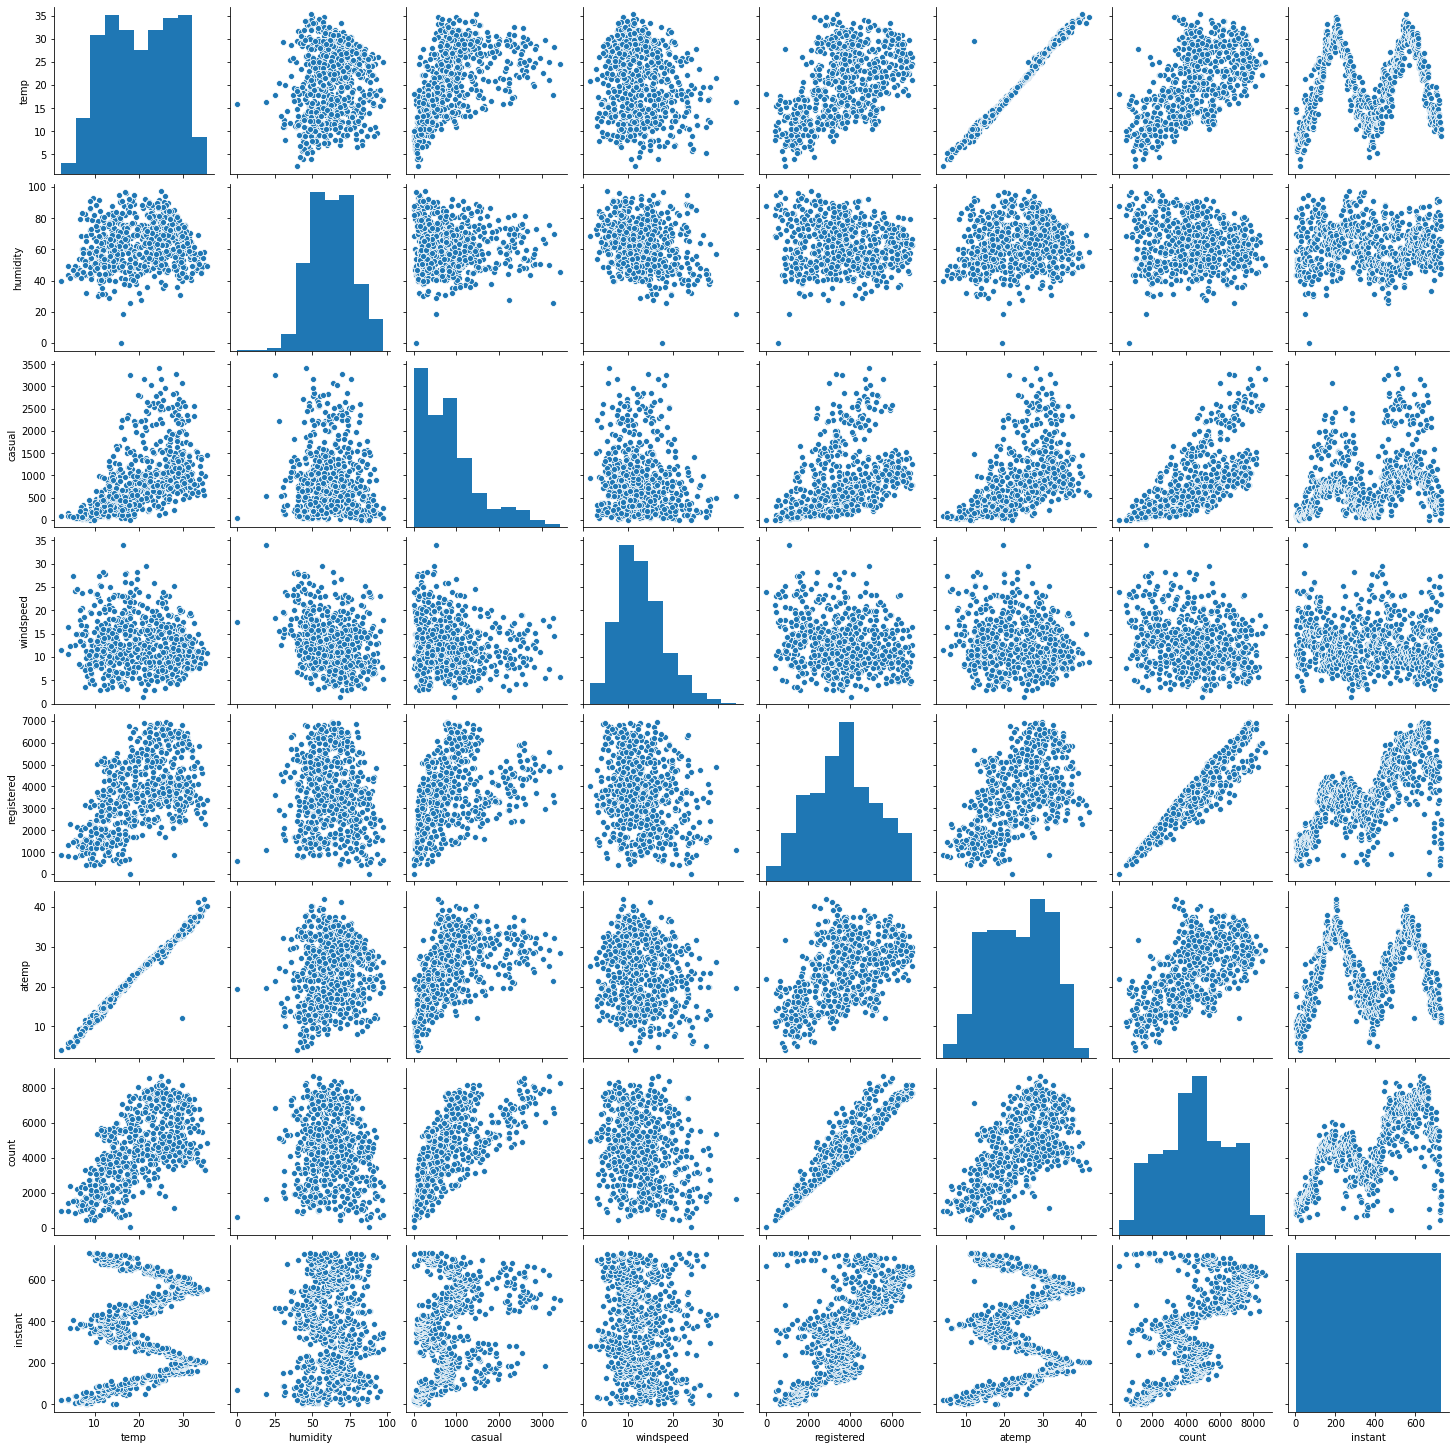

In [17]:
#Pairplot for numeric variables
sns.pairplot(bike_data, vars=["temp", "humidity",'casual','windspeed','registered','atemp','count','instant'])
plt.show()

We can see that there are some independent variables look positively correlated to the 'count' variable.

Target variable 'count' is more correlated to 'temp','atemp','registered' and casual.

Visualisation of Categorical Variables

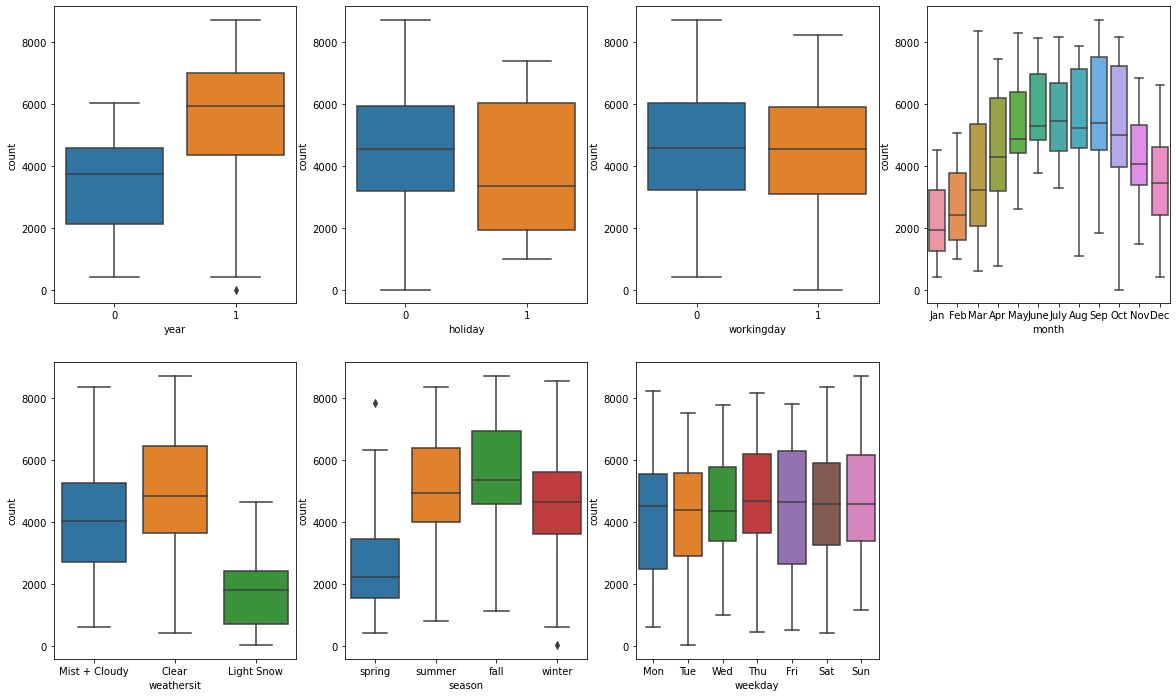

In [18]:
##Relationship between categorical and continuous variable

plt.figure(figsize=(20, 12))

plt.subplot(2,4,1)
sns.boxplot(x = 'year', y = 'count', data = bike_data)

plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'count', data = bike_data)

plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'count', data = bike_data)

plt.subplot(2,4,4)
sns.boxplot(x = 'month', y = 'count', data = bike_data)

plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'count', data = bike_data)

plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'count', data = bike_data)

plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'count', data = bike_data)

plt.show()

Insights shows the relationship between categorical variables and a Target variable.

Bike Rentals are more :

1) during the Fall season and then in summer
2) in the year 2019 compared to 2018
3) in clear weathersit after than in mistcloudy and lightsnow
4) on thursday, friday and sunday.
5) in july after that in september.

Heatmap

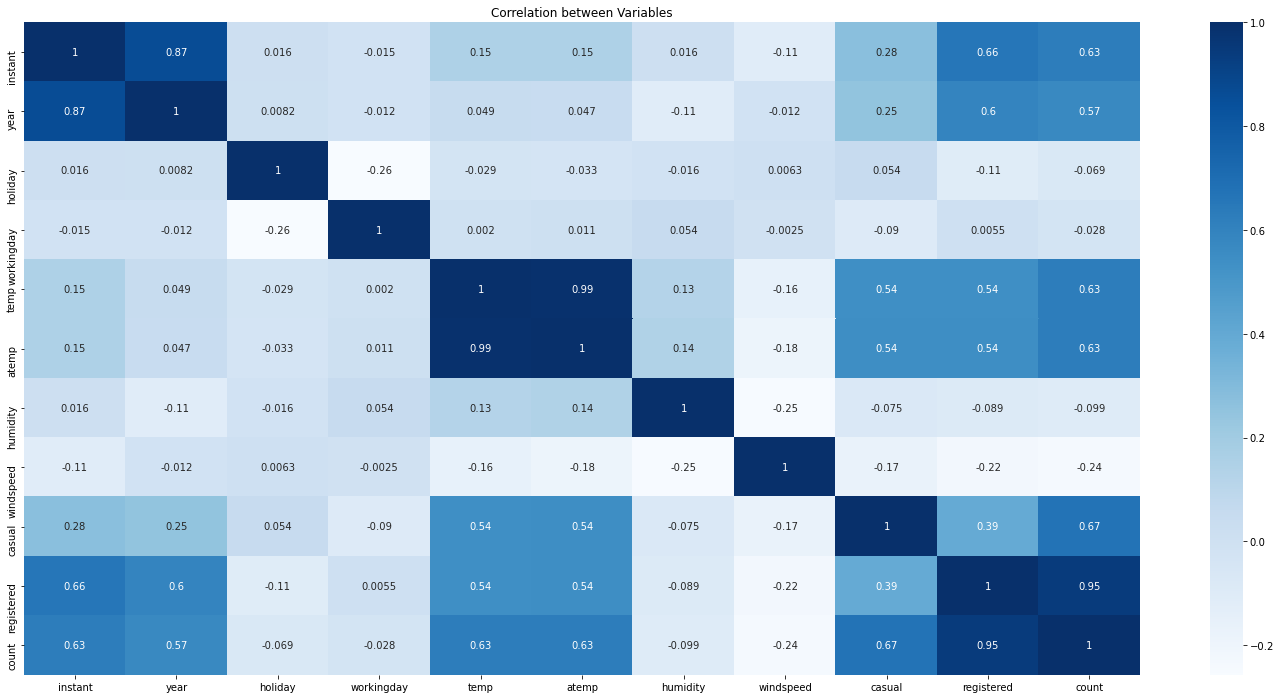

In [19]:
#Heatmap to see correlation between variables
plt.figure(figsize=(25, 12))
sns.heatmap(bike_data.corr(), cmap='Blues', annot = True)
plt.title("Correlation between Variables")
plt.show()

We can see temp, atemp, casual,registered,instant variables are highly correlated to 'count' variable

In [20]:
#Create a copy of the  dataframe, without the 'instant' column, 
#as this will have unique values, and do not make sense to do a value count on it.

bike_dummy=bike_data.iloc[:,1:16]

In [21]:
for col in bike_dummy:
    print(bike_dummy[col].value_counts(ascending=False))

28-05-2019    1
05-09-2018    1
29-08-2018    1
24-05-2018    1
25-08-2018    1
             ..
08-03-2018    1
30-10-2018    1
18-06-2019    1
01-02-2018    1
08-01-2018    1
Name: dteday, Length: 730, dtype: int64
fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64
1    365
0    365
Name: year, dtype: int64
Mar     62
Oct     62
May     62
July    62
Jan     62
Dec     62
Aug     62
Sep     60
Apr     60
Nov     60
June    60
Feb     56
Name: month, dtype: int64
0    709
1     21
Name: holiday, dtype: int64
Mon    105
Tue    105
Wed    104
Sun    104
Thu    104
Sat    104
Fri    104
Name: weekday, dtype: int64
1    504
0    226
Name: workingday, dtype: int64
Clear            463
Mist + Cloudy    246
Light Snow        21
Name: weathersit, dtype: int64
10.899153    5
26.035000    5
23.130847    4
28.563347    4
27.880000    4
            ..
27.025847    1
19.270000    1
13.191299    1
24.155847    1
5.526103     1
Name: temp, Length: 498, dtype: int64
32.

Insight:

Through this we can conclude that there seems to be no Junk/Unknown values in the entire dataset.

## Step 3 :  Data Preparation

## Removing the unwanted column

The unwanted columns are:
1) instant: shows only index values which is not needed.
2) dteday: shows date year and month, but we already have year and month column so it is not needed.
3) casual & registered: Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns

In [22]:
bike_data.columns

Index(['instant', 'dteday', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'count'],
      dtype='object')

We will create a new data frame which will contain only those column which are needed.

In [23]:
bike_data_new= bike_data[['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'humidity', 'windspeed','count']]

## Creating Dummy Variables

We will create DUMMY variables for 4 categorical variables 'month', 'weekday', 'season' & 'weathersit'.

In [24]:
bike_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  count       730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


This code does 3 things:
1) Create Dummy variable
2) Drop original variable for which the dummy was created
3) Drop first dummy variable for each set of dummies created.

In [25]:
bike_data_new = pd.get_dummies(bike_data_new, drop_first=True)
bike_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      730 non-null    int64  
 1   holiday                   730 non-null    int64  
 2   workingday                730 non-null    int64  
 3   temp                      730 non-null    float64
 4   atemp                     730 non-null    float64
 5   humidity                  730 non-null    float64
 6   windspeed                 730 non-null    float64
 7   count                     730 non-null    int64  
 8   season_spring             730 non-null    uint8  
 9   season_summer             730 non-null    uint8  
 10  season_winter             730 non-null    uint8  
 11  month_Aug                 730 non-null    uint8  
 12  month_Dec                 730 non-null    uint8  
 13  month_Feb                 730 non-null    uint8  
 14  month_Jan 

In [26]:
bike_data_new.shape

(730, 30)

In [27]:
bike_data_new.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,season_spring,season_summer,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist + Cloudy
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,...,0.084932,0.082192,0.143836,0.142466,0.142466,0.142466,0.143836,0.142466,0.028767,0.336986
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,...,0.278971,0.274845,0.351164,0.349767,0.349767,0.349767,0.351164,0.349767,0.167266,0.473004
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 4 : Splitting the data into train and test

In [28]:
# Splitting the data to Train and Test: - We will now split the data into TRAIN and TEST (70:30 ratio)
# We will use train_test_split method from sklearn package for this

from sklearn.model_selection import train_test_split

In [29]:
# We should specify 'random_state' so that the train and test data set always have the same rows, respectively.

np.random.seed(0)
df_train, df_test = train_test_split(bike_data_new, train_size = 0.70, test_size = 0.30, random_state = 100)

In [30]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      510 non-null    int64  
 1   holiday                   510 non-null    int64  
 2   workingday                510 non-null    int64  
 3   temp                      510 non-null    float64
 4   atemp                     510 non-null    float64
 5   humidity                  510 non-null    float64
 6   windspeed                 510 non-null    float64
 7   count                     510 non-null    int64  
 8   season_spring             510 non-null    uint8  
 9   season_summer             510 non-null    uint8  
 10  season_winter             510 non-null    uint8  
 11  month_Aug                 510 non-null    uint8  
 12  month_Dec                 510 non-null    uint8  
 13  month_Feb                 510 non-null    uint8  
 14  month_Jan

In [31]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      219 non-null    int64  
 1   holiday                   219 non-null    int64  
 2   workingday                219 non-null    int64  
 3   temp                      219 non-null    float64
 4   atemp                     219 non-null    float64
 5   humidity                  219 non-null    float64
 6   windspeed                 219 non-null    float64
 7   count                     219 non-null    int64  
 8   season_spring             219 non-null    uint8  
 9   season_summer             219 non-null    uint8  
 10  season_winter             219 non-null    uint8  
 11  month_Aug                 219 non-null    uint8  
 12  month_Dec                 219 non-null    uint8  
 13  month_Feb                 219 non-null    uint8  
 14  month_Jan

In [32]:
df_train.shape

(510, 30)

In [33]:
df_test.shape

(219, 30)

## Visualising the Numerical Data

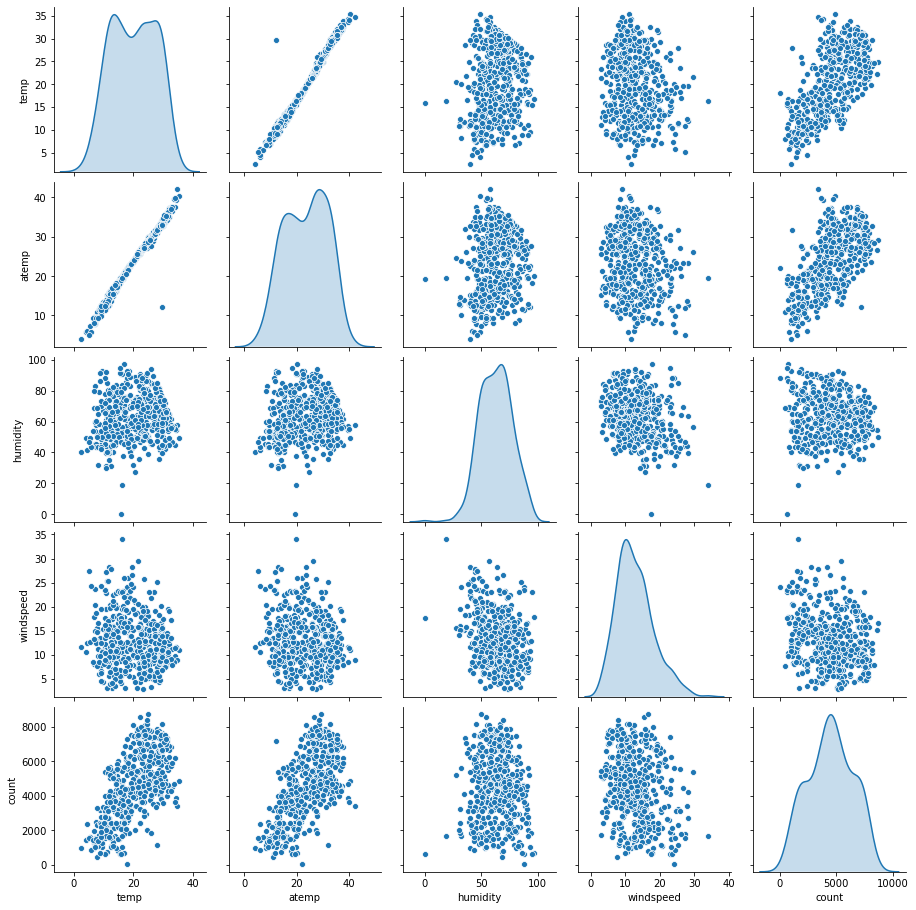

In [34]:
# Create a new dataframe of only numeric variables:

bike_num=df_train[[ 'temp', 'atemp', 'humidity', 'windspeed','count']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

Insights
The above Pair-Plot tells us that there is a LINEAR RELATION between 'temp','atemp' and 'cnt'

## Visualising Catagorical Variables

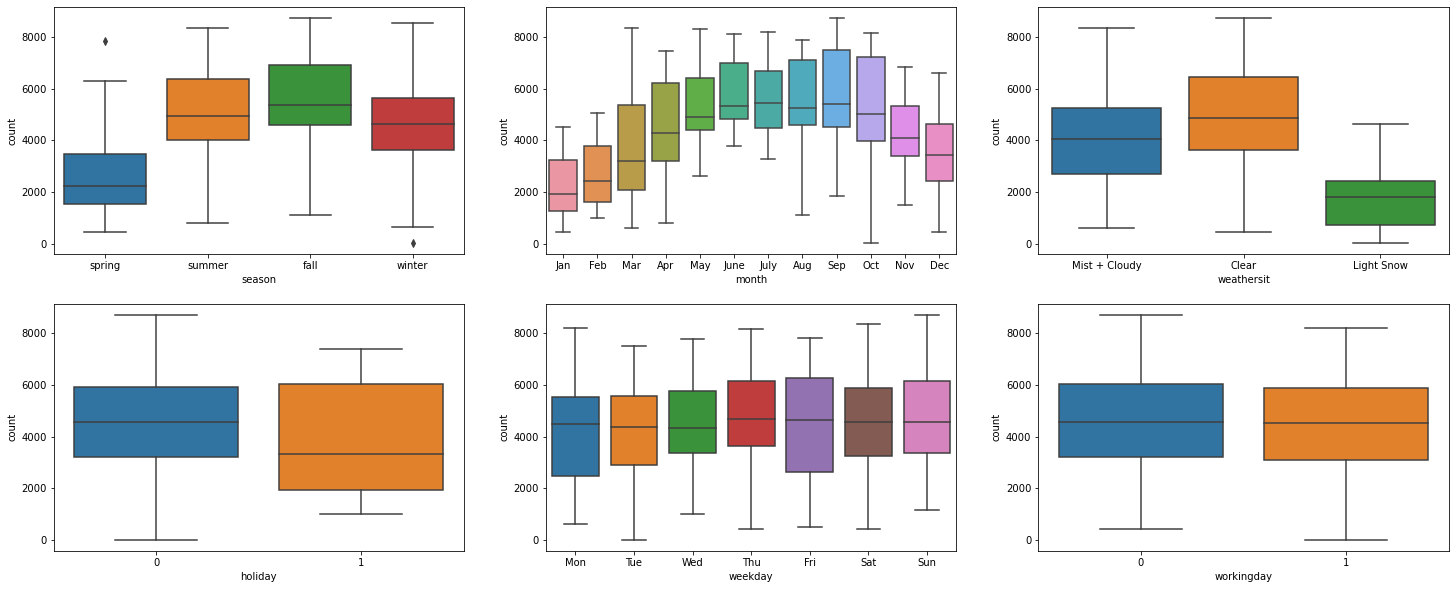

In [35]:
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'count', data = bike_data)
plt.subplot(2,3,2)
sns.boxplot(x = 'month', y = 'count', data = bike_data)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'count', data = bike_data)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'count', data = bike_data)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'count', data = bike_data)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'count', data = bike_data)
plt.show()

## Correlation Matrix

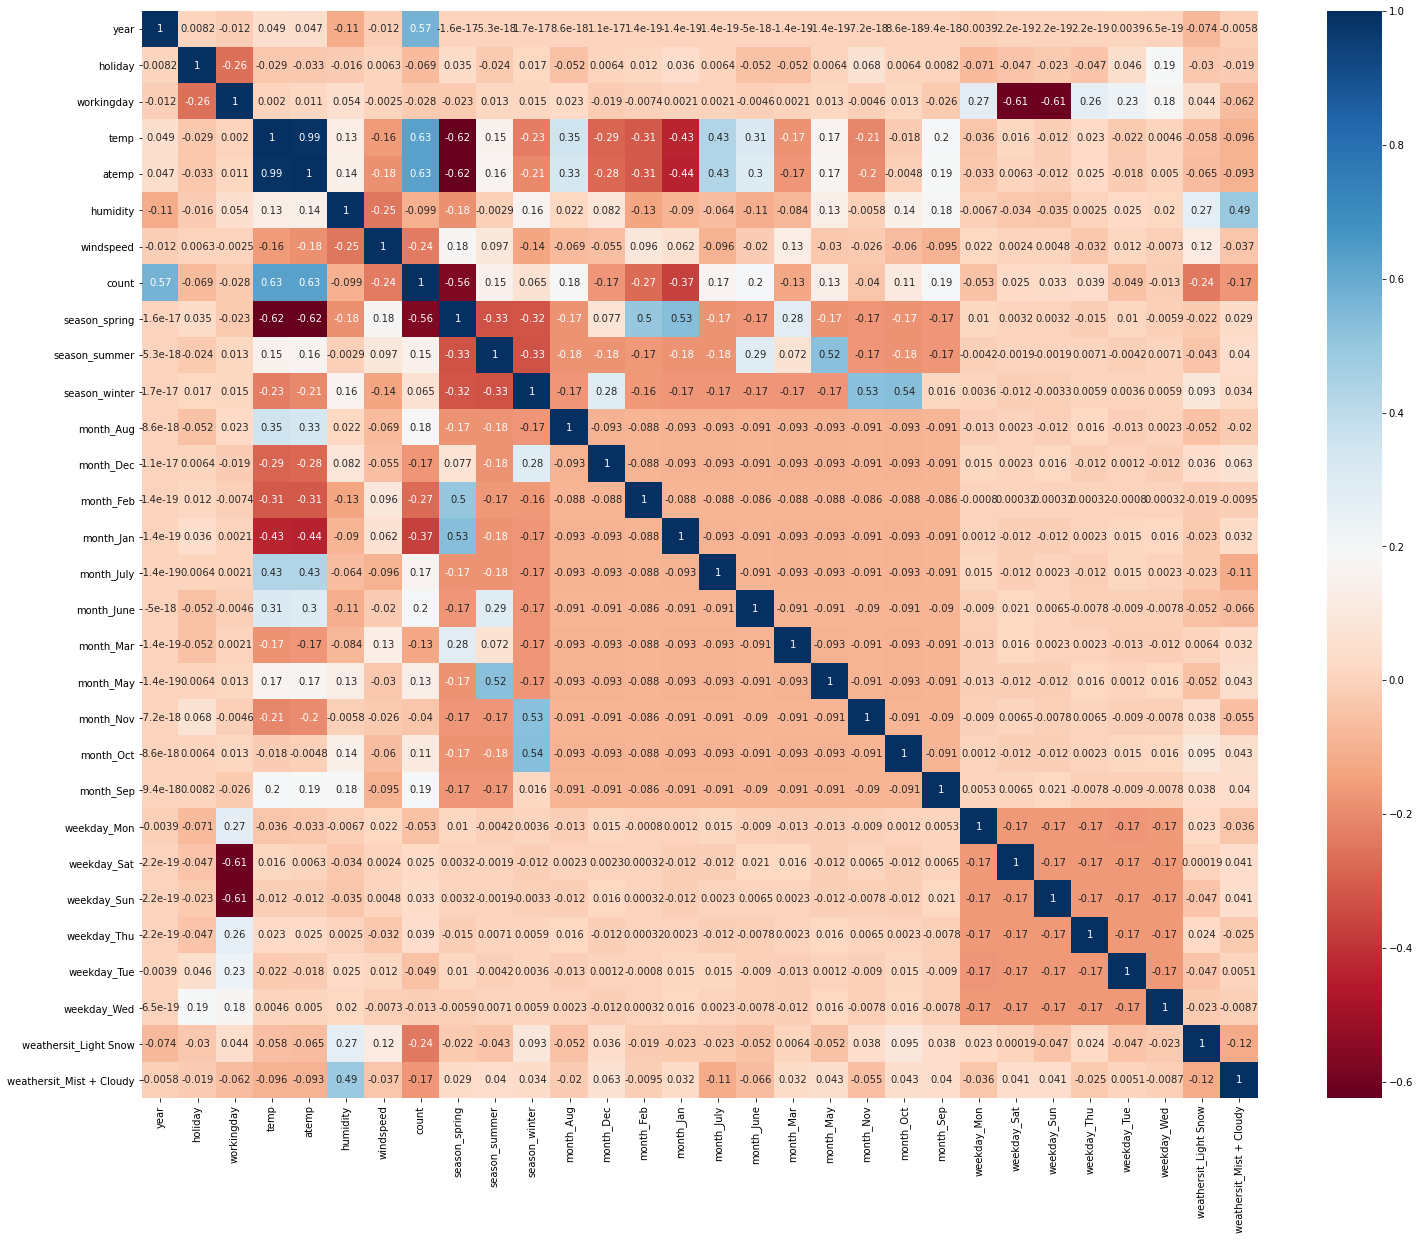

In [36]:
# Let's check the correlation coefficients to see which variables are highly correlated. Note:
# here we are considering only those variables (dataframe: bike_new) that were chosen for analysis

plt.figure(figsize = (25,20))
sns.heatmap(bike_data_new.corr(), annot = True, cmap="RdBu")
plt.show()

## Rescaling The Features

It is important to have all the variables on the same scale for the model to be easily interpretable. We can use standardization or normalization so that the units of the coefficients obtained are all on the same scale.

There are two common ways of rescaling:
1)Min-Max scaling (Normalisation):Between 0 and 1
2)Standardisation :mean-0, sigma-1

## Min-Max scaling

In [37]:
#import the library
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [38]:
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,season_spring,season_summer,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist + Cloudy
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,0,1,0,0,0,0,1


In [39]:
# Apply scaler() to all the numeric variables.
#Create a list of numeric variables.

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','count']

# Fit on data.
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [40]:
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,season_spring,season_summer,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist + Cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1


In [41]:
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,season_spring,season_summer,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist + Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Correlation Matrix

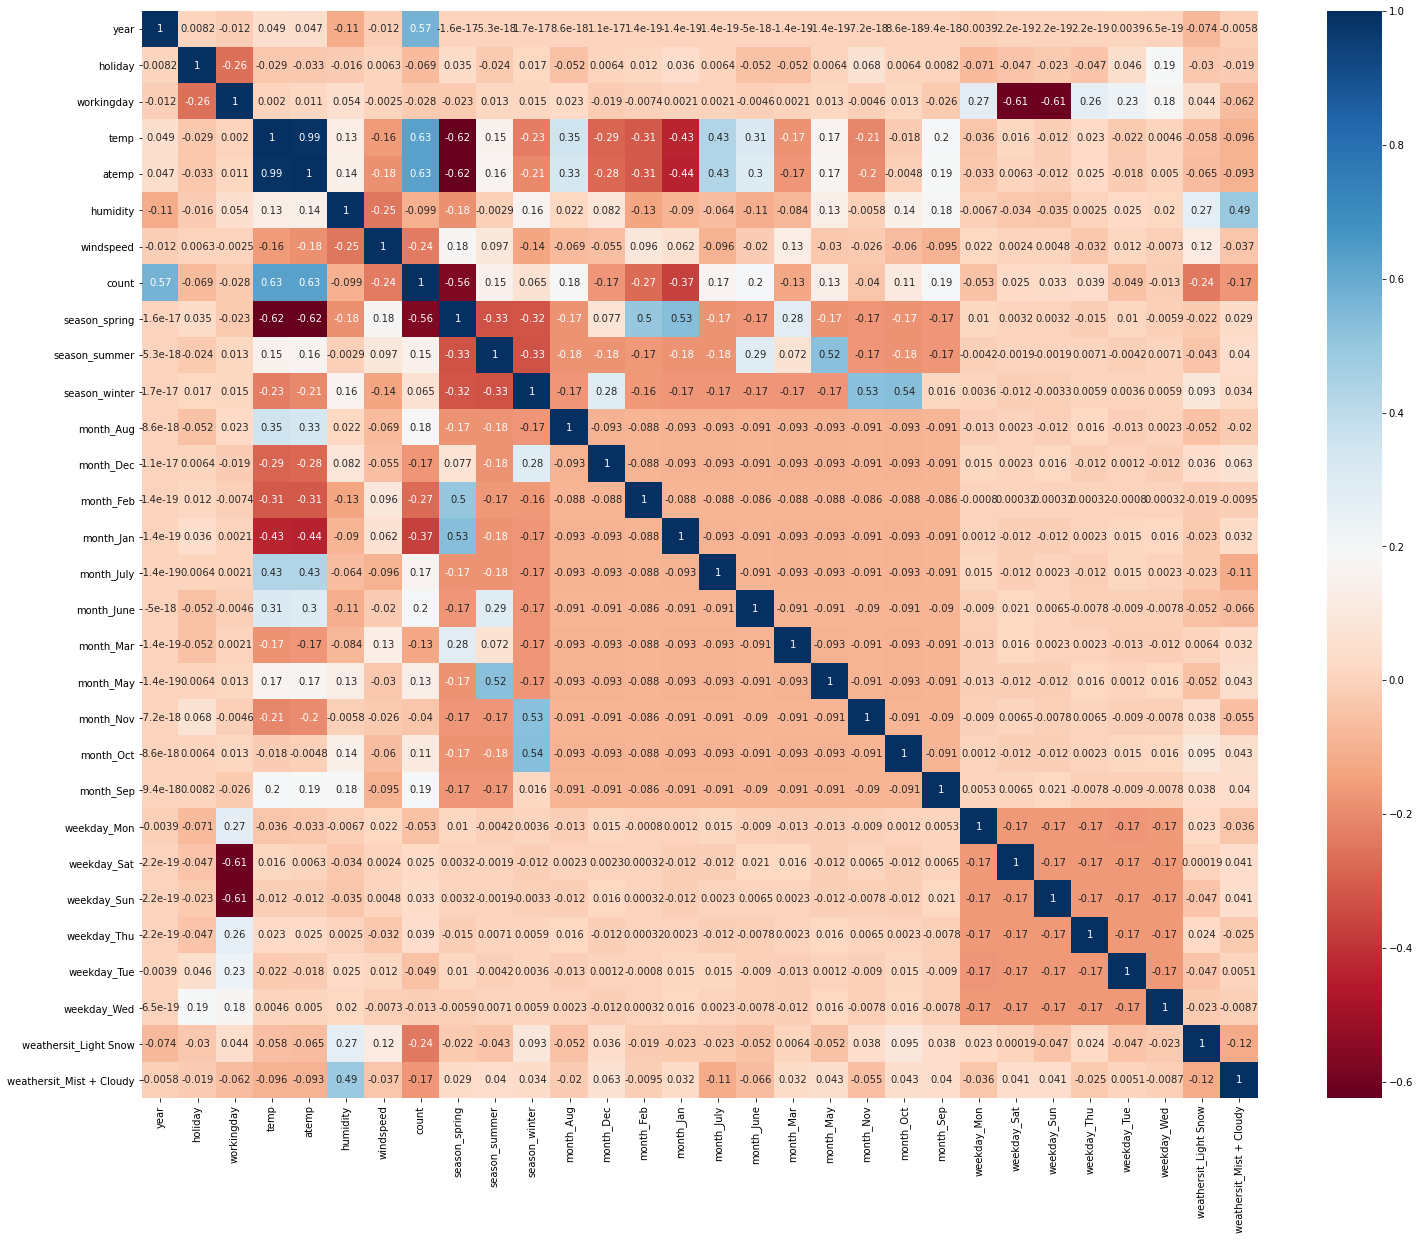

In [42]:
# Let's check the correlation coefficients to see which variables are highly correlated. Note:
# here we are considering only those variables (dataframe: bike_new) that were chosen for analysis

plt.figure(figsize = (25,20))
sns.heatmap(bike_data_new.corr(), annot = True, cmap="RdBu")
plt.show()


## Step 5 : BUILDING A LINEAR MODEL

## Dividing into X and Y sets for the model building

In [43]:
y_train = df_train.pop('count')
X_train = df_train

## Recursive feature elimination(RFE)

In [44]:
#Recursive feature elimination: We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE.
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [45]:
# Running RFE with the output number of the variable equal to 15.
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [46]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('month_Aug', False, 10),
 ('month_Dec', True, 1),
 ('month_Feb', False, 2),
 ('month_Jan', True, 1),
 ('month_July', True, 1),
 ('month_June', False, 14),
 ('month_Mar', False, 15),
 ('month_May', False, 7),
 ('month_Nov', True, 1),
 ('month_Oct', False, 12),
 ('month_Sep', True, 1),
 ('weekday_Mon', False, 9),
 ('weekday_Sat', False, 4),
 ('weekday_Sun', False, 5),
 ('weekday_Thu', False, 13),
 ('weekday_Tue', False, 8),
 ('weekday_Wed', False, 11),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist + Cloudy', True, 1)]

In [47]:
#Columns where RFE support is True
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'month_Dec', 'month_Jan',
       'month_July', 'month_Nov', 'month_Sep', 'weathersit_Light Snow',
       'weathersit_Mist + Cloudy'],
      dtype='object')

In [48]:
#Columns where RFE support is False
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'month_Aug', 'month_Feb', 'month_June',
       'month_Mar', 'month_May', 'month_Oct', 'weekday_Mon', 'weekday_Sat',
       'weekday_Sun', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [49]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

## Step 6 : Building Linear Model using 'STATS MODEL'

## Model 1

In [50]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,30.94
2,temp,17.80
4,windspeed,4.72
5,season_spring,4.37
7,season_winter,4.06
6,season_summer,2.81
14,weathersit_Mist + Cloudy,2.32
0,year,2.09
11,month_Nov,1.83
9,month_Jan,1.75


In [51]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)


In [52]:
# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [53]:
# Check the parameters obtained

lr1.params

const                       0.320243
year                        0.230328
holiday                    -0.091228
temp                        0.479977
humidity                   -0.160227
windspeed                  -0.188457
season_spring              -0.061737
season_summer               0.040767
season_winter               0.103435
month_Dec                  -0.037199
month_Jan                  -0.043748
month_July                 -0.055495
month_Nov                  -0.040949
month_Sep                   0.074891
weathersit_Light Snow      -0.248116
weathersit_Mist + Cloudy   -0.055876
dtype: float64

In [54]:
#Let's see the summary of our linear model
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Sat, 02 Oct 2021   Prob (F-statistic):          3.34e-189
Time:                        19:44:30   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

## Model 2

In [55]:
# Removing the variable 'month_Dec' based on its High VIF value.
X_train_new = X_train_rfe.drop(["month_Dec"], axis = 1)

In [56]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,29.12
2,temp,16.80
4,windspeed,4.71
5,season_spring,4.37
7,season_winter,3.78
6,season_summer,2.79
13,weathersit_Mist + Cloudy,2.29
0,year,2.09
8,month_Jan,1.67
9,month_July,1.59


In [57]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [58]:
# Check the parameters obtained

lr2.params

const                       0.303050
year                        0.230120
holiday                    -0.092199
temp                        0.505231
humidity                   -0.168201
windspeed                  -0.185388
season_spring              -0.056383
season_summer               0.046634
season_winter               0.098613
month_Jan                  -0.033925
month_July                 -0.056220
month_Nov                  -0.025288
month_Sep                   0.079785
weathersit_Light Snow      -0.241759
weathersit_Mist + Cloudy   -0.054304
dtype: float64

In [59]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.4
Date:                Sat, 02 Oct 2021   Prob (F-statistic):          2.25e-189
Time:                        19:44:31   Log-Likelihood:                 512.39
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     495   BIC:                            -931.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

## Model 3

In [60]:
#Removing the variable 'hum' based on its Very High 'VIF' value.
X_train_new = X_train_new.drop(["humidity"], axis = 1)

In [61]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.15
3,windspeed,4.67
4,season_spring,2.76
6,season_winter,2.29
5,season_summer,2.23
0,year,2.07
7,month_Jan,1.61
8,month_July,1.59
9,month_Nov,1.59
12,weathersit_Mist + Cloudy,1.56


In [62]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [63]:
lr3.params

const                       0.221421
year                        0.234273
holiday                    -0.093129
temp                        0.465639
windspeed                  -0.153089
season_spring              -0.065763
season_summer               0.039913
season_winter               0.081934
month_Jan                  -0.038788
month_July                 -0.050944
month_Nov                  -0.022974
month_Sep                   0.073734
weathersit_Light Snow      -0.287901
weathersit_Mist + Cloudy   -0.081080
dtype: float64

In [64]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.1
Date:                Sat, 02 Oct 2021   Prob (F-statistic):          2.54e-186
Time:                        19:44:31   Log-Likelihood:                 502.35
No. Observations:                 510   AIC:                            -976.7
Df Residuals:                     496   BIC:                            -917.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

## Model 4

In [65]:
#Removing the variable 'month_Nov' based on its Very High p-value.
X_train_new = X_train_new.drop(["month_Nov"], axis = 1)

In [66]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.13
3,windspeed,4.61
4,season_spring,2.75
5,season_summer,2.22
0,year,2.07
6,season_winter,1.79
7,month_Jan,1.61
8,month_July,1.59
11,weathersit_Mist + Cloudy,1.56
9,month_Sep,1.34


In [67]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [68]:
lr4.params

const                       0.215488
year                        0.234197
holiday                    -0.097317
temp                        0.472772
windspeed                  -0.154925
season_spring              -0.061504
season_summer               0.042205
season_winter               0.077050
month_Jan                  -0.037996
month_July                 -0.050722
month_Sep                   0.076239
weathersit_Light Snow      -0.286377
weathersit_Mist + Cloudy   -0.080675
dtype: float64

In [69]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     213.1
Date:                Sat, 02 Oct 2021   Prob (F-statistic):          3.97e-187
Time:                        19:44:32   Log-Likelihood:                 501.48
No. Observations:                 510   AIC:                            -977.0
Df Residuals:                     497   BIC:                            -921.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

## Model 5

In [70]:
#Removing the variable 'month_Jan' based on its Very High p-value.
X_train_new = X_train_new.drop(["month_Jan"], axis = 1)

In [71]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,season_summer,2.21
4,season_spring,2.08
0,year,2.07
6,season_winter,1.79
7,month_July,1.58
10,weathersit_Mist + Cloudy,1.55
8,month_Sep,1.34
9,weathersit_Light Snow,1.08


In [72]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [73]:
lr5.params

const                       0.199648
year                        0.233482
holiday                    -0.098013
temp                        0.491508
windspeed                  -0.147977
season_spring              -0.066942
season_summer               0.045280
season_winter               0.083084
month_July                 -0.052418
month_Sep                   0.076686
weathersit_Light Snow      -0.285155
weathersit_Mist + Cloudy   -0.081558
dtype: float64

In [74]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Sat, 02 Oct 2021   Prob (F-statistic):          2.40e-187
Time:                        19:44:33   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

## Model 6

In [75]:
#Removing the variable 'month_July' based on its High 'p-value'.
X_train_new = X_train_new.drop(["month_July"], axis = 1)

In [76]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.59
2,temp,3.84
0,year,2.07
4,season_spring,1.99
5,season_summer,1.89
6,season_winter,1.63
9,weathersit_Mist + Cloudy,1.54
7,month_Sep,1.23
8,weathersit_Light Snow,1.08
1,holiday,1.04


In [77]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [78]:
lr6.params

const                       0.190994
year                        0.234060
holiday                    -0.096865
temp                        0.478177
windspeed                  -0.148155
season_spring              -0.055092
season_summer               0.060987
season_winter               0.095929
month_Sep                   0.090932
weathersit_Light Snow      -0.286002
weathersit_Mist + Cloudy   -0.080124
dtype: float64

In [79]:
# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.2
Date:                Sat, 02 Oct 2021   Prob (F-statistic):          7.36e-187
Time:                        19:44:33   Log-Likelihood:                 495.16
No. Observations:                 510   AIC:                            -968.3
Df Residuals:                     499   BIC:                            -921.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Insights

This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model.

So we go ahead and make our predictions using this model only.

The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis.

A rule of thumb commonly used in practice is if a VIF is > 10, you have high multicollinearity. In our case, with values less than 5, we are in good shape, and can proceed with our regression

R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale. And we have the R-square value of 0.833 or 83.3%

The adjusted R-squared adjusts for the number of terms in the model. And we got it around 0.830 or 83%

## Step 7: Final Model Interpretation

## Hypothesis testing

#Hypothesis testing states that:

#H0:B1=B2=...=Bn=0 (Coefficient values are equal to zero)
#H1: at least one Bi!=0 (Atleast one Coefficient value should not be equal to zero)

In [80]:
lr6.params

const                       0.190994
year                        0.234060
holiday                    -0.096865
temp                        0.478177
windspeed                  -0.148155
season_spring              -0.055092
season_summer               0.060987
season_winter               0.095929
month_Sep                   0.090932
weathersit_Light Snow      -0.286002
weathersit_Mist + Cloudy   -0.080124
dtype: float64

Insight:

From the lr6 model summary, it is evident that all our coefficients are not equal to zero which means We REJECT the NULL HYPOTHESIS.

# The equation of best fitted surface based on model lr6:

count = 0.190994 + (year x 0.234060) - (holiday x 0.096865) + (temp x 0.478177 ) - (windspeed x 0.148155) - (season_spring x 0.055092) + (season_summer x 0.060987) + (season_winter x 0.095929) + (month_Sep x 0.090932) - (weathersit_Light Snow x 0.286002) + (weathersit_Mist+Cloudy x 0.080124)

## F- Statistics

F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

    F-statistic: 185.4 
    Prob (F-statistic): 5.82e-161
    
The F-Statistics value of 185.4 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant.

## Step 8: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [81]:
y_train_pred = lr6.predict(X_train_lm6)

Text(0.5, 0, 'Errors')

<Figure size 432x288 with 0 Axes>

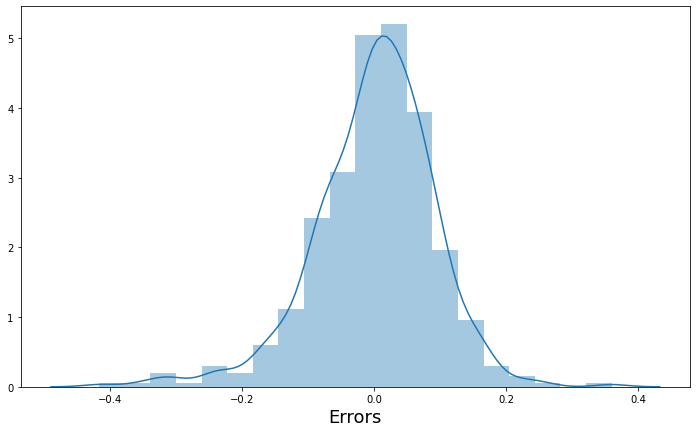

In [82]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
plt.figure(figsize=(12,7))
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)       

Insights:

From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

## Step 9: Making Predictions

Applying the scaling on the test sets

In [83]:
num_vars = ['temp', 'atemp', 'humidity', 'windspeed','count']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [84]:
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,season_spring,season_summer,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist + Cloudy
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,1,0,0,0,0,0,0


Dividing into X_test and y_test

In [85]:
y_test = df_test.pop('count')
X_test = df_test

In [86]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      219 non-null    int64  
 1   holiday                   219 non-null    int64  
 2   workingday                219 non-null    int64  
 3   temp                      219 non-null    float64
 4   atemp                     219 non-null    float64
 5   humidity                  219 non-null    float64
 6   windspeed                 219 non-null    float64
 7   season_spring             219 non-null    uint8  
 8   season_summer             219 non-null    uint8  
 9   season_winter             219 non-null    uint8  
 10  month_Aug                 219 non-null    uint8  
 11  month_Dec                 219 non-null    uint8  
 12  month_Feb                 219 non-null    uint8  
 13  month_Jan                 219 non-null    uint8  
 14  month_Jul

In [87]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   const                     219 non-null    float64
 1   year                      219 non-null    int64  
 2   holiday                   219 non-null    int64  
 3   temp                      219 non-null    float64
 4   windspeed                 219 non-null    float64
 5   season_spring             219 non-null    uint8  
 6   season_summer             219 non-null    uint8  
 7   season_winter             219 non-null    uint8  
 8   month_Sep                 219 non-null    uint8  
 9   weathersit_Light Snow     219 non-null    uint8  
 10  weathersit_Mist + Cloudy  219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.5 KB


In [88]:
# Making predictions using the final model (lr6)

y_pred = lr6.predict(X_test_lm6)

## Step 10: Model Evaluation

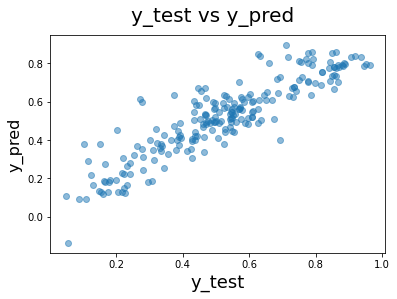

In [89]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

## R^2 Value for TEST

In [90]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8035441330582013

## Adjusted R^2 Value for TEST

In [91]:
r2= 0.8035441330582013 # As calculated above.

In [92]:
X_test.shape

(219, 10)

In [93]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

In [94]:
# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7940991394552301

1) Train R^2 :0.833

2) Train Adjusted R^2 :0.830

3) Test R^2 :0.803

4) Test Adjusted R^2 :0.794

5) Difference in R^2 between train and test: 0.03 i.e 3%

6) Difference in adjusted R^2 between Train and test: 0.036 i.e 3.6%

This seems to be a really good model that can very well 'Generalize' various datasets.